# Breed Classifier

### Problem statement :

We are implementing CNN Classifier for Classifying breed of dogs and cats images.

#### About Dataset :
This dataset has been taken from Cats and Dogs Breeds Classification Oxford Dataset.

Dataset contains total 8 breeds of cats and dogs 4 classes of each.

### Dependencies
* Jupyter notebook
* Tensorflow
* Keras
* Python 3.7
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy

#### Split of dataset
Image training set contain 200 images for each category. I split those into 3:1 means test Split each class images into 150 for train and 50 for test.


### Importing required packages

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from PIL import Image

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Breed names of Cats and Dogs

In [3]:
breed_names=["Abyssinian Cat","American Bulldog","American Pitbull",
             "Basset Hound","Beagle Dog","Bengal Cat","Birman Cat","Bombay Cat"]

### Data Augmentation and Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('F:\\Breed\\train',
                                             target_size=(64,64),
                                             batch_size=40,
                                             class_mode='categorical')
#Validation Set
test_set = test_datagen.flow_from_directory('F:\\Breed\\test',
                                           target_size=(64,64),
                                           batch_size = 40,
                                           class_mode='categorical',
                                           shuffle=False)


Found 1200 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


### Data Exploration

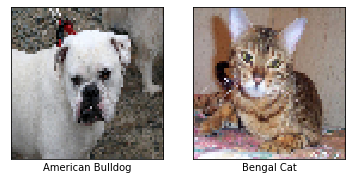

In [5]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(8,8))
#for i in range(2):
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(breed_names[1])
img1 = image.load_img(r'F:\Breed\test\\American Bulldog\\american_bulldog_190.jpg', grayscale=False, color_mode='rgb',target_size=(64, 64),interpolation='nearest')
plt.imshow(img1)

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(breed_names[5])
img2 = image.load_img(r'F:\Breed\test\\Bengal Cat\\Bengal_182.jpg', grayscale=False, color_mode='rgb',target_size=(64, 64),interpolation='nearest')
plt.imshow(img2)

plt.show()

### CNN Model building

In [6]:
import tensorflow as tf
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=8,activation='softmax'))

### Model Compilation

In [7]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Training of model

In [8]:
nb_epoch=10    #Number of epochs

classifier.fit_generator(train_set,
                        steps_per_epoch=30, 
                        epochs = nb_epoch,
                        validation_data = test_set,
                        validation_steps = 10, 
                        #callbacks=[tensorboard_callback]
                        );

Epoch 1/10
30/30 [==============================] - 21s 711ms/step - loss: 2.0807 - accuracy: 0.2100 - val_loss: 2.0032 - val_accuracy: 0.2175
Epoch 2/10
30/30 [==============================] - 18s 588ms/step - loss: 1.8221 - accuracy: 0.3008 - val_loss: 1.7659 - val_accuracy: 0.3050
Epoch 3/10
30/30 [==============================] - 18s 595ms/step - loss: 1.6014 - accuracy: 0.3975 - val_loss: 1.7108 - val_accuracy: 0.3500
Epoch 4/10
30/30 [==============================] - 18s 591ms/step - loss: 1.4126 - accuracy: 0.4675 - val_loss: 1.6787 - val_accuracy: 0.3425
Epoch 5/10
30/30 [==============================] - 18s 595ms/step - loss: 1.3196 - accuracy: 0.5358 - val_loss: 1.6952 - val_accuracy: 0.3750
Epoch 6/10
30/30 [==============================] - 18s 595ms/step - loss: 1.2284 - accuracy: 0.5433 - val_loss: 1.7329 - val_accuracy: 0.3775
Epoch 7/10
30/30 [==============================] - 18s 609ms/step - loss: 1.1352 - accuracy: 0.5858 - val_loss: 1.7047 - val_accuracy: 0.3775

### Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1

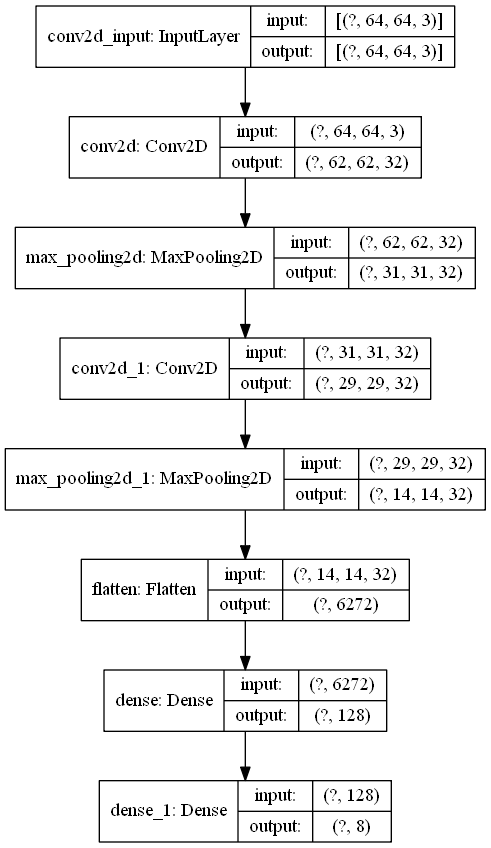

In [9]:
classifier.summary()

from tensorflow.keras.utils import plot_model

plot_model(classifier,'breed_cnn_model.png', show_shapes=True)

### Representation of Train class and Test class

In [10]:
import numpy as np

# Here we are using predict() which gives the probability output for every class.

y_prob=classifier.predict(test_set)
y_hat=np.argmax(y_prob,axis=1)          #Predicted class

y=test_set.classes                      #Actual class

# We can also use predict_proba() which gives the probability output for every class.
# We can compute class from there by getting the index of max probility among all the classes
# np.where(y_hat[0] == y_hat[0].max())

# We can also use predict_classes() which gives the output class. It evaluates internally from probability of softmax output
# and convert the vector to integer which represents the class

#### Creating Dataframe

In [11]:
import pandas as pd
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':y_prob[:,0],
    'y':test_set.classes,
    'y_hat':y_hat
})

#### First 10 rows of test data

In [12]:
df.head(10)

,filename,predict,y,y_hat
0,Abyssinian Cat\Abyssinian_164.jpg,0.018159,0,1
1,Abyssinian Cat\Abyssinian_165.jpg,0.026782,0,5
2,Abyssinian Cat\Abyssinian_166.jpg,0.142203,0,5
3,Abyssinian Cat\Abyssinian_167.jpg,0.339378,0,0
4,Abyssinian Cat\Abyssinian_168.jpg,0.306423,0,5
5,Abyssinian Cat\Abyssinian_169.jpg,0.777860,0,0
6,Abyssinian Cat\Abyssinian_170.jpg,0.003703,0,1
7,Abyssinian Cat\Abyssinian_172.jpg,0.333516,0,5
8,Abyssinian Cat\Abyssinian_173.jpg,0.419403,0,5
9,Abyssinian Cat\Abyssinian_174.jpg,0.966153,0,0


#### Last 10 rows of test data

In [13]:
df.tail(10)

,filename,predict,y,y_hat
390,Bombay Cat\Bombay_206.jpg,0.004396,7,7
391,Bombay Cat\Bombay_208.jpg,0.000550,7,7
392,Bombay Cat\Bombay_209.jpg,0.000030,7,7
393,Bombay Cat\Bombay_210.jpg,0.000145,7,7
394,Bombay Cat\Bombay_213.jpg,0.001587,7,7
395,Bombay Cat\Bombay_214.jpg,0.962076,7,0
396,Bombay Cat\Bombay_215.jpg,0.002970,7,6
397,Bombay Cat\Bombay_217.jpg,0.126879,7,7
398,Bombay Cat\Bombay_220.jpg,0.003617,7,7
399,Bombay Cat\Bombay_221.jpg,0.007880,7,7


## Prediction of single image

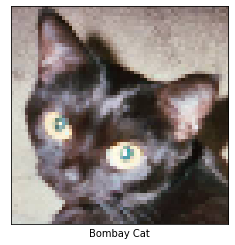

Predicted class :  7
Predicted Breed :  Bombay Cat

Actual class :  7
Actual Breed :  Bombay Cat


In [14]:
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

index=394

img1 = image.load_img(r'F:\Breed\test\\'+df['filename'][index], grayscale=False, color_mode='rgb',target_size=(64, 64),interpolation='nearest')
plt.xlabel(breed_names[y[index]])
plt.xticks([])
plt.yticks([])
plt.imshow(img1)
plt.show()

print("Predicted class : ",y_hat[index])
print("Predicted Breed : ",breed_names[y_hat[index]])
print()
print("Actual class : ",y[index])
print("Actual Breed : ",breed_names[y[index]])


### Misclassified Images

In [15]:
misclassified = df[df['y']!=df['y_hat']]
print('Total no. of misclassified images from 400 Validation images : %d'%misclassified['y'].count())

Total no. of misclassified images from 400 Validation images : 231


### Confusion Matrix

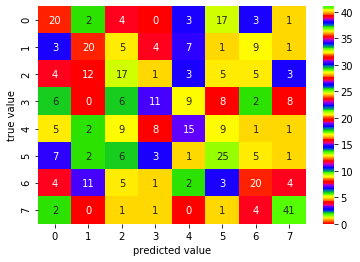

In [16]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_hat)
sns.heatmap(conf_matrix,cmap="prism",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

### Model Evaluation

In [17]:
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [18]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 72.75%     Training loss  : 0.809003
Validation Accuracy: 42.25%     Validation loss: 1.773675


### Dynamic Plotting of Training Loss and Test Loss

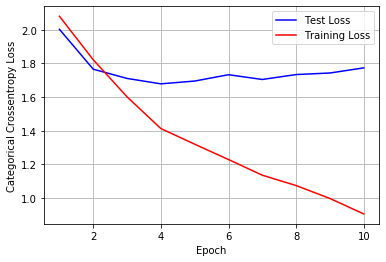

In [19]:


def dyn_plt(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label = "Test Loss")
    ax.plot(x, ty, 'r', label = "Training Loss")
    plt.grid()
    plt.legend()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch');
ax.set_ylabel('Categorical Crossentropy Loss')

x=list(range(1,nb_epoch+1))

vy=classifier.history.history['val_loss']
ty=classifier.history.history['loss']
dyn_plt(x, vy, ty, ax)

## Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of 42.25% on Validation Data.
It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training.